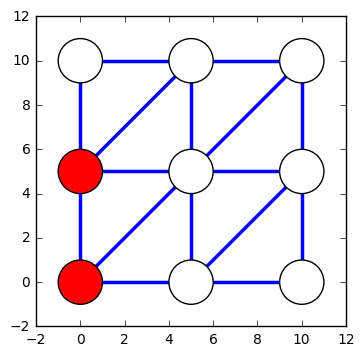

In [1]:
from IPython import display
import time
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random
import copy
import pdb

def plot_configuration(state, fig):
    plt.axes()
    line1 = plt.Line2D((0, 10), (0, 0), lw=2.5,zorder=1)
    plt.gca().add_line(line1)
    line2 = plt.Line2D((0,10), (5, 5), lw=2.5,zorder=1)
    plt.gca().add_line(line2)
    line3 = plt.Line2D((0,10), (10, 10), lw=2.5,zorder=1)
    plt.gca().add_line(line3)

    lineA = plt.Line2D((0, 0), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineA)
    lineB = plt.Line2D((5,5), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineB)
    lineC = plt.Line2D((10,10), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineC)

    lineA1 = plt.Line2D((0, 10), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineA1)
    lineB2 = plt.Line2D((0,5), (5, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineB2)
    lineC3 = plt.Line2D((5,10), (0, 5), lw=2.5,zorder=1)
    plt.gca().add_line(lineC3)


    circle_1_1 = plt.Circle((0, 0), radius=1, fc=state[0],zorder=2)
    plt.gca().add_patch(circle_1_1)
    circle_1_2 = plt.Circle((0, 5), radius=1, fc=state[3],zorder=2)
    plt.gca().add_patch(circle_1_2)
    circle_1_3 = plt.Circle((0, 10), radius=1, fc=state[6],zorder=2)
    plt.gca().add_patch(circle_1_3)

    circle_2_1 = plt.Circle((5, 0), radius=1, fc=state[1],zorder=2)
    plt.gca().add_patch(circle_2_1)
    circle_2_2 = plt.Circle((5, 5), radius=1, fc=state[4],zorder=2)
    plt.gca().add_patch(circle_2_2)
    circle_2_3 = plt.Circle((5, 10), radius=1, fc=state[7],zorder=2)
    plt.gca().add_patch(circle_2_3)

    circle_3_1 = plt.Circle((10, 0), radius=1, fc=state[2],zorder=2)
    plt.gca().add_patch(circle_3_1)
    circle_3_2 = plt.Circle((10, 5), radius=1, fc=state[5],zorder=2)
    plt.gca().add_patch(circle_3_2)
    circle_3_3 = plt.Circle((10, 10), radius=1, fc=state[8],zorder=2)
    plt.gca().add_patch(circle_3_3)

    plt.axis('scaled')
    #plt.show()
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

plt.ion()
fig,ax = plt.subplots(1,1)
state=['w','w','w','w','w','w','w','w','w']
#state[1] ="r"
#plot_configuration(state, fig)
def test():
    for i in range(9):
        print(i)
        plot_configuration(state, fig)
        state[i] = "r"
        time.sleep(0.2)
state[0] = "r"
state[3] = "r"
plot_configuration(state, fig)
 

15


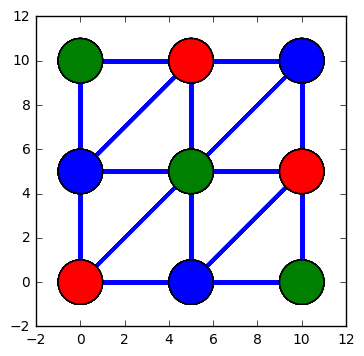

In [5]:
def depthFirstSearch(state, domain, constraints, fig):
    global nbExecutions
    nbExecutions = nbExecutions +1
    #abort recursion when the last state has an assigned value and all constraints are satisfied
    if state[len(state)-1] != "w": 
        if constraints(state) == True: #in DFS, this is the only place, when we check for constraint satisfiability
            plot_configuration(state, fig)
            return state, True
        else:
            plot_configuration(state, fig)
            return state, False
    
    #go through the variables until we find an unassigned one
    for i in range(len(state)):
        if(state[i] == "w"):
            #go through the domain values and try assigning the variable a value
            for r in range(len(domain)):
                state[i]=domain[r]
                #Backtracking: check if the current domain value does not lead to an invalid constraint in backprob
                if constraints(state) == False:
                    continue
                plot_configuration(state, fig)
                time.sleep(0.01)
                temp, success = depthFirstSearch(state, domain, constraints, fig)
                if success:
                    return temp, True
            state[i] = "w"
            return state, False
    return state, False

def checkConstraint(state):
    if state[0] == state[1] and state[0] != "w":
        return False
    if state[0] == state[3] and state[0] != "w":
        return False
    if state[0] == state[4] and state[0] != "w":
        return False
    if state[1] == state[4] and state[1] != "w":
        return False
    if state[1] == state[5] and state[1] != "w":
        return False
    if state[1] == state[2] and state[1] != "w":
        return False
    if state[0] == state[1] and state[0] != "w":
        return False
    if state[2] == state[5] and state[2] != "w":
        return False
    if state[3] == state[4] and state[3] != "w":
        return False
    if state[3] == state[6] and state[3] != "w":
        return False
    if state[3] == state[7] and state[3] != "w":
        return False
    if state[4] == state[5] and state[4] != "w":
        return False
    if state[4] == state[7] and state[4] != "w":
        return False
    if state[4] == state[8] and state[4] != "w":
        return False
    if state[5] == state[8] and state[5] != "w":
        return False
    if state[6] == state[7] and state[6] != "w":
        return False
    if state[7] == state[8] and state[7] != "w":
        return False
    return True

plt.ion()
fig,ax = plt.subplots(1,1)
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
constraints = checkConstraint   
nbExecutions = 0
solution, finalResult = depthFirstSearch(state, domain, constraints, fig)
print(nbExecutions)

# Improve Backtracking

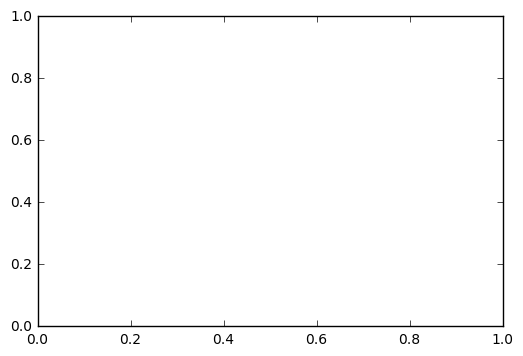

In [2]:
def returnCoordinatesForIndex(nbCirles, i, nbColumns):
    y = -5
    x = -5
    for k in range(nbCirles):
        if k % nbColumns == 0:
            y = y + 5
            x = 0
        if i == k:
            return x, y
        x = x + 5
    #should not happen
    return 0, 0
            
def plot_configuration_withDomainValues(state, domains, constraints, fig, nbColumns=3):
    plt.axes()
    if len(state)>len(domains):
        print(state)
        print(domains)
        pdb.set_trace()
    #draw circles
    for i in range(len(state)):
        x, y = returnCoordinatesForIndex(len(state),i,nbColumns)
        #circumvent bug in plt: old circles stay there, so we taint them in the color of the underlying circle
        for r in range(1,3):
            generic_circle = plt.Circle((x-1+r, y), radius=0.3, fc=state[i],zorder=3, linewidth=0)
            plt.gca().add_patch(generic_circle)    
        for r in range(len(domains[i])):
            generic_circle = plt.Circle((x-1+r, y), radius=0.25, fc=domains[i][r],zorder=3)
            plt.gca().add_patch(generic_circle)
        
        generic_circle = plt.Circle((x, y), radius=1.5, fc=state[i],zorder=2)
        plt.gca().add_patch(generic_circle)
        
    #draw constraints
    temp_state = ["w"] * len(state)
    for i in range(len(state)-1):
        temp_state[i] = "r"
        for k in range(i+1,len(state)):
            temp_state[k] = "r"
            if constraints(temp_state) == False:
                x1,y1 = returnCoordinatesForIndex(len(state),i,nbColumns)
                x2,y2 = returnCoordinatesForIndex(len(state),k,nbColumns)
                generic_line = plt.Line2D((x1,x2),(y1,y2),lw=2.5,zorder=1)
                plt.gca().add_line(generic_line)
            temp_state[k] = "w"
        temp_state[i] = "w"
    plt.axis('scaled')
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

plt.ion()
fig,ax = plt.subplots(1,1)
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
#constraints = checkConstraint    
domains = [copy.deepcopy(domain) for i in range(len(state))]
#state[1] ="r"
#plot_configuration(state, fig)
def test():
    for i in range(9):
        print(i)
        plot_configuration_withDomainValues(state, domains, constraints, fig)
        state[i] = "r"
        time.sleep(0.2)

#plot_configuration_withDomainValues(state, domains, constraints, fig)
state[0] = "r"
state[3] = "r"
domains[0] = ["r"]
domains[3] = ["r"]
#plot_configuration_withDomainValues(state, domains, constraints, fig)

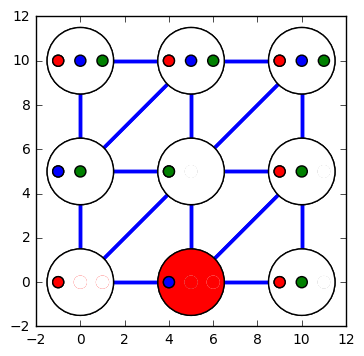

12


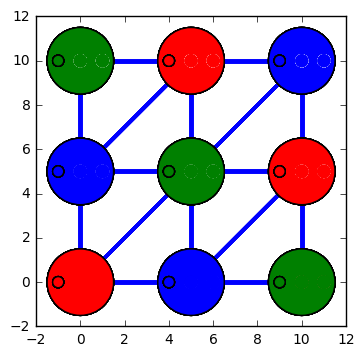

In [33]:
def getNeighbors(state, position, constraints):
    temp_state = state=['w','w','w','w','w','w','w','w','w']
    neighbors = list()
    temp_state[position] = "r"
    for k in range(position+1, len(state)):
        temp_state[k] = "r"
        if(constraints(temp_state)) == False:
            neighbors.append(k)
        temp_state[k] = "w"
    return neighbors
    
def solveCSP(state, domains, constraints, position, fig):
    global nbExecutions
    nbExecutions = nbExecutions + 1
    #abort recursion when the last state has an assigned value and all constraints are satisfied
    if state[len(state)-1] != "w": 
        if constraints(state) == True: #in DFS, this is the only place, when we check for constraint satisfiability
            plot_configuration_withDomainValues(state, domains, constraints, fig)
            return state, True
        else:
            plot_configuration_withDomainValues(state, domains, constraints, fig)
            return state, False
    
    if state[position] == "w" and len(domains[position]) > 0:
        for value in domains[position]:
            temp_state = copy.deepcopy(state)
            temp_domains = copy.deepcopy(domains)
            temp_state[position] = value
            if constraints(temp_state) == False:
                continue
            temp_domains[position] = [value]
            
            #Forward checking
            failedForward = False
            neighbors = getNeighbors(temp_state, position, constraints)
            for neighbor in neighbors:
                if len(temp_domains[neighbor]) == 1 and value in temp_domains[neighbor]:
                    failedForward = True
                    break
            if failedForward:
                continue
            for neighbor in neighbors:
                if value in temp_domains[neighbor]:
                    temp_domains[neighbor].remove(value)
            
            #plotting and recursion step
            plot_configuration_withDomainValues(temp_state, temp_domains, constraints, fig)
            time.sleep(0.01)         
            temp_state, success = solveCSP(temp_state, temp_domains, constraints, position+1,fig)
            if success:
                return temp_state, True
        return state, False
    else:
        return state, False

plt.ion()
fig,ax = plt.subplots(1,1)
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
domains = [copy.deepcopy(domain) for i in range(len(state))]
constraints = checkConstraint    
nbExecutions = 0
solution, finalResult = solveCSP(state, domains, constraints, 0,fig)
print(nbExecutions)

# Iterative Solving

10


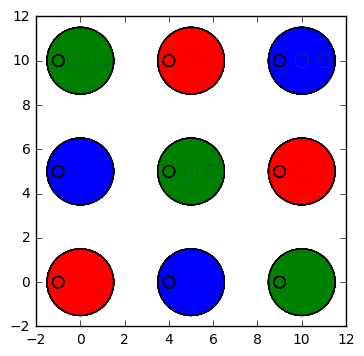

In [5]:
def checkConstraintReturnConflicting(state):
    conflictingVariables = set([])
    conflict = False
    if state[0] == state[1] and state[0] != "w":
        conflict = True
        conflictingVariables.add(0)
        conflictingVariables.add(1)
    if state[0] == state[3] and state[0] != "w":
        conflict = True
        conflictingVariables.add(0)
        conflictingVariables.add(3)
    if state[0] == state[4] and state[0] != "w":
        conflict = True
        conflictingVariables.add(0)
        conflictingVariables.add(4)
    if state[1] == state[4] and state[1] != "w":
        conflict = True
        conflictingVariables.add(4)
        conflictingVariables.add(1)
    if state[1] == state[5] and state[1] != "w":
        conflict = True
        conflictingVariables.add(5)
        conflictingVariables.add(1)
    if state[1] == state[2] and state[1] != "w":
        conflict = True
        conflictingVariables.add(2)
        conflictingVariables.add(1)
    if state[2] == state[5] and state[2] != "w":
        conflict = True
        conflictingVariables.add(5)
        conflictingVariables.add(2)
    if state[3] == state[4] and state[3] != "w":
        conflict = True
        conflictingVariables.add(3)
        conflictingVariables.add(4)
    if state[3] == state[6] and state[3] != "w":
        conflict = True
        conflictingVariables.add(6)
        conflictingVariables.add(3)
    if state[3] == state[7] and state[3] != "w":
        conflict = True
        conflictingVariables.add(3)
        conflictingVariables.add(7)
    if state[4] == state[5] and state[4] != "w":
        conflict = True
        conflictingVariables.add(5)
        conflictingVariables.add(4)
    if state[4] == state[7] and state[4] != "w":
        conflict = True
        conflictingVariables.add(7)
        conflictingVariables.add(4)
    if state[4] == state[8] and state[4] != "w":
        conflict = True
        conflictingVariables.add(8)
        conflictingVariables.add(4)
    if state[5] == state[8] and state[5] != "w":
        conflict = True
        conflictingVariables.add(8)
        conflictingVariables.add(5)
    if state[6] == state[7] and state[6] != "w":
        conflict = True
        conflictingVariables.add(7)
        conflictingVariables.add(6)
    if state[7] == state[8] and state[7] != "w":
        conflict = True
        conflictingVariables.add(8)
        conflictingVariables.add(7)
    return conflict, list(conflictingVariables)

def iterativeImprovement(state, domain, domains, constraints, fig):
    global iterations
    plot_configuration_withDomainValues(state, domains, constraints, fig)
    conflict, conflictingVariables = constraints(state)
    #pdb.set_trace()
    while conflict:
        iterations = iterations + 1
        pick = random.randint(0, len(conflictingVariables)-1)
        lowestConflict = len(state)+1
        lowestConflictValue = "w"
        for i in domain:
            temp_state = copy.deepcopy(state)
            temp_domains = copy.deepcopy(domains)
            temp_state[conflictingVariables[pick]] = i
            conflict, nbConflicts = constraints(temp_state)
            if lowestConflict > len(nbConflicts):
                lowestConflict = len(nbConflicts)
                lowestConflictValue = i
        state[conflictingVariables[pick]] = lowestConflictValue
        domains[conflictingVariables[pick]] = [lowestConflictValue]
        plot_configuration_withDomainValues(state, domains, constraints, fig)
        conflict, conflictingVariables = constraints(state)
        time.sleep(0.01)   
    plot_configuration_withDomainValues(state, domains, constraints, fig)
    return state
    
plt.ion()
fig,ax = plt.subplots(1,1)    
#random generation of a solution
initialSol = []
domain = ["r","b","g"]
domains = [copy.deepcopy(domain) for i in range(len(state))]
for i in range(9):
    value = random.randint(0, 2)
    initialSol.append(domain[value])
    domains[i] = [domain[value]]
iterations = 0
solution = iterativeImprovement(initialSol, domain, domains, checkConstraintReturnConflicting, fig)
print(iterations)


In [3]:
1

1